---

# Практические задания.

# Задача Коши для ОДУ первого порядка.

## I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

<IPython.core.display.Javascript object>

Теперь попробуем задать значение шага $\tau$ (в коде это `dt`) такое, что $|\lambda| \tau > 1$.

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=12/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

<IPython.core.display.Javascript object>

## Задание 1. Неявный метод Эйлера.

Решите то же самое уравнение $$d u / d t=\lambda u, $$
 используя невную схему Эйлера. Сравните поведение неявной и явной схем Эйлера.  Постройте решение для нескольких значений шага интегрирования, опишите поведение решения при $\lambda\tau > 2$. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1-lam*dt)
    return tt, y


[0.1   0.825 1.55  2.275 3.   ]
4.0
0.1


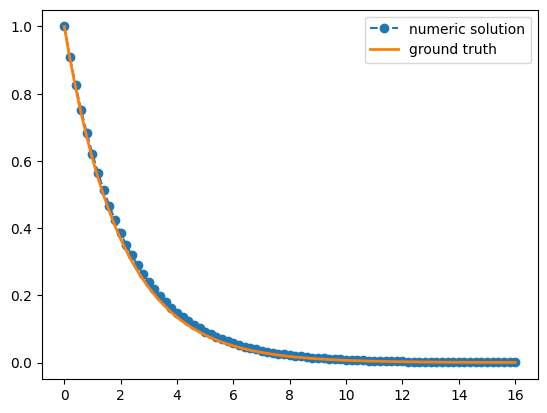

0.825


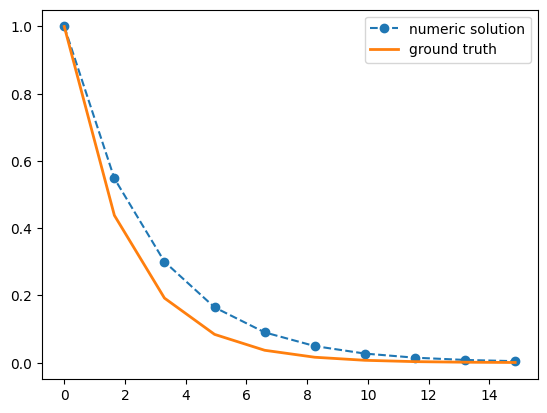

1.55


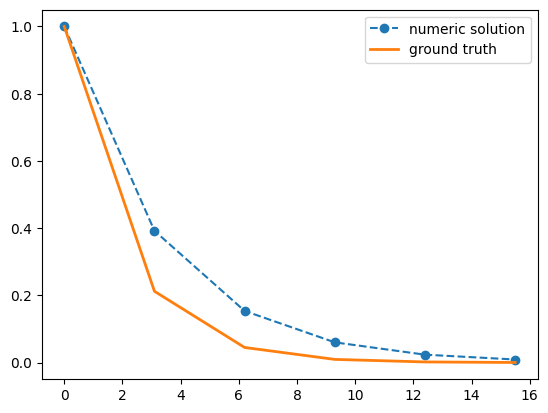

2.275


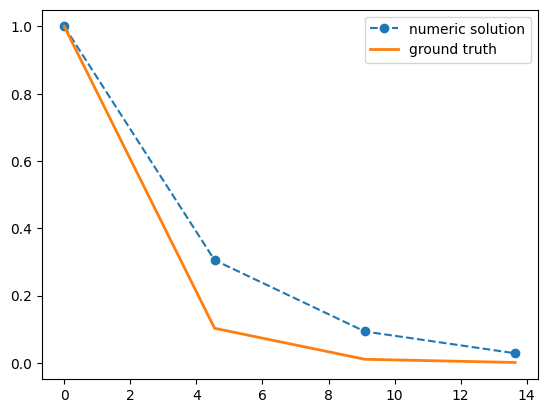

3.0


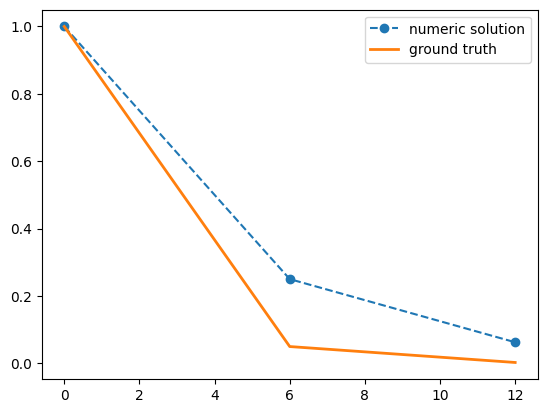

In [3]:
# Нарисовать графики с разными значениями шага, и отдельно при lambda*tau > 2.
lam = -0.5
n = np.linspace(0.1, 3, 5)
print(n)
print(abs(lam)*4/(abs(lam)))
for i in n:
    print(i)
    tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=i/(abs(lam)))
    plt.plot(tt, y, 'o--', label='numeric solution')
    plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
    plt.legend(loc='best')
    plt.show()

In [4]:
# Для тестирования

lam = -0.5 
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()

## II. Системы линейных уравнений

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = \mathrm{const}$ - заданная матрица 2$\times$2.


## Задание 2. Сравнение явной схемы Эйлера и матричной экспоненты.


Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [5]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((num_steps+1, 2))
    
    y[0,:] = u0

    for k in range(num_steps):
        y[k+1,0] = y[k,0] + dt*(y[k,0]*a[0,0] + y[k,1]*a[0,1])
        y[k+1,1] = y[k,1] + dt*(y[k,0]*a[1,0] + y[k,1]*a[1,1])
    
    return tt, y
    
    
    raise NotImplementedError()


a = np.array([[-1, 1],
              [0, -1]], dtype=float)

t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)


Напишите функцию, возвращающую решение задачи Коши для системы уравнений $du/dt = A u$ с постоянной матрицей $A$ через матричную экспоненту. (Используйте библиотечную функцию `scipy.linalg.expm`)

In [6]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
    
    u0 : ndarray, shape (ndim,)
    
    tt : ndarray, shape (n,)
        The values of $t$
        
    Return
    ------
    u : ndarray, shape (n, ndim)
        u[:, k] is $\exp(t[k] A)$
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    dt = tt[1] - tt[0]
    num_steps = len(tt)
    y = np.empty((num_steps, 2))
    y[0,:] = u0
    for k in range(num_steps):
        am = expm(a*dt*k)
        y[k,:] = np.dot(am, u0)
        
    
    return  y
    
    

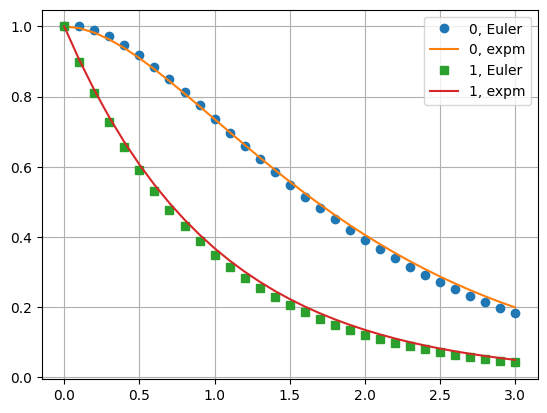

In [7]:
# Solve via Euler's method, compare to the matrix exponential

from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

In [8]:
# Сравните здесь метод Эйлера с методом матричной экспоненты

a = np.array([[-1, 1],
              [0, -1]], dtype=float)


## III. Жесткие системы

Рассмотрим линейную систему, $du/dt = Au$, с матрицей правой части 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $u = (1, 0)^T$.

Система называется жесткой, если для всех $(x, \vec{y}(x))$ (на решениях системы) собственные значения матрицы Якоби системы  $\mathbf{J}(x)$ (в данном случае она равна $A$)  удовлетворяют условиям

 $\max _j\left|\operatorname{Re} \lambda_j\right| / \min _k\left|\operatorname{Re} \lambda_k\right| \gg 1, \quad \operatorname{Re} \lambda_j<0$, $\max _j\left|\operatorname{Im} \lambda_j\right| \ll \max _k\left|\operatorname{Re} \lambda_k\right| \forall j, k$. 
 
 Число $s=\max _i\left|\operatorname{Re} \lambda_i\right| / \min _k\left|\operatorname{Re} \lambda_k\right|$ называется числом жесткости системы.

Пример.

Для решения задачи Коши системы ОДУ используется численный метод Рунге-Кутты, заданный таблицей Бутчера:
$$
\left.\begin{array}{c}
u^{\prime}=-800 u+4 \cdot 10^{-2} v+2 \cdot 10^{-2} w, u(0)=0, \\
v^{\prime}=-5 v-3 w, v(0)=4, \\
w^{\prime}=v-w, w(0)=6,
\end{array}\right\} \quad \quad \begin{array}{l|ll}
1 / 5 & 1 / 5 & 0 \\
4 / 5 & 3 / 5 & 1 / 5 \\
\hline & 1 / 2 & 1 / 2
\end{array}
$$
Получим для него функцию и условие устойчивости. Вычислим число жёсткости.

$$
R(z)=\frac{1+\frac{3}{5} z+\left(\frac{1}{2}-\frac{2}{5}+\frac{1}{25}\right) z^2}{1-\frac{2}{5} z+\frac{1}{25} z^2}
$$
Матрица $\mathbf{J}(x)$ (см. формулу (7.1.3)) постоянна и ее собственные значения $\lambda_1=-2, \lambda_2=-4, \lambda_3=-800$ лежат на действительной оси. Так как $z_i=\lambda_i h$, то и функцию устойчивости достаточно исследовать на действительной оси. 

Область устойчивости определяется из условия $|R(z)| \leq 1$. Получаем

 $\operatorname{Im} z_i=0, \operatorname{Re} z_i\left(1+\operatorname{Re} z_i / 10\right) \leq 0, i=1,2,3$.


Шаг интегрирования, который удовлетворяет всем условиям $h \in(0,10 / 800]$. 

Число жесткости $s=800 / 2=400$. 

## Задание 3.  Проверка жёсткости системы и неявные методы.

Найдите собственные значения матрицы $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

Решите систему, используя фиксированный шаг $$\tau=0.01 .$$ 

 Стабилен ли метод на шаге такого размера? 


[  -9.34647667 -499.65352333]
-9.346476672269716
s = 53.45902427704808
Система умеренной жесткости


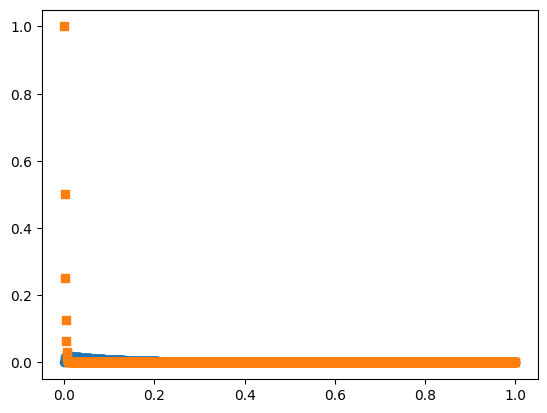

Нестабильно


In [9]:
from numpy import linalg as LA
a = np.array([[-10,10],
              [32, -499]])
vals = LA.eigvals(a)
print(vals)
print(max(vals))
print("s =", max(abs(vals)/min(abs(vals))))
print("Система умеренной жесткости")


T = 1
dt = 0.001
u0 = np.array([0,1])

num_steps = int(T/dt)
tt = np.arange(num_steps+1)*dt
y = np.zeros((num_steps+1, 2))
y[0,:] = u0
t = np.arange(num_steps+1)*dt
for k in range(num_steps):
    y[k+1,0] = y[k,0] + dt*(y[k,0]*a[0,0] + y[k,1]*a[0,1])
    y[k+1,1] = y[k,1] + dt*(y[k,0]*a[1,0] + y[k,1]*a[1,1])

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.show()
print("Нестабильно")



Постройте графики решения системы на интервале $0 < t < 1$ с начальным условием $u = (1, 0)^T$ используя функции `euler_solve2` и `mat_exp_solve`. Используйте несколько значений шага, например $\tau = 4\cdot 10^{-3}$ и $\tau = 4.5\cdot 10^{-3}$. Прокомментируйте поведение решений.

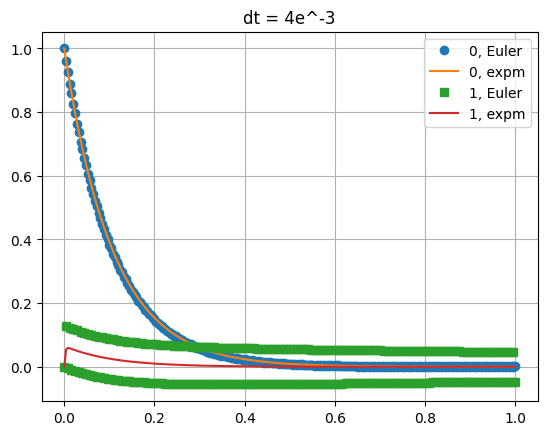

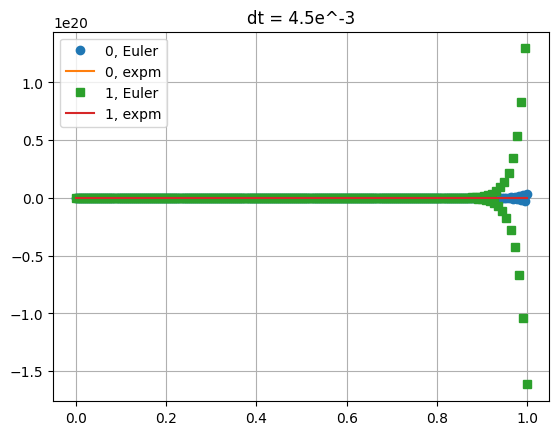

In [10]:
a = np.array([[-10,10],
              [32, -499]])
t, y  = euler_solve2(a, u0=[1, 0], T=1, dt=4e-3)
ym = mat_exp_solve(a, [1, 0], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')
plt.title("dt = 4e^-3")
plt.legend(loc='best')
plt.grid(True)
plt.show()

t, y  = euler_solve2(a, u0=[1, 0], T=1, dt=4.5e-3)
ym = mat_exp_solve(a, [1, 0], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')
plt.title("dt = 4.5e^-3")
plt.legend(loc='best')
plt.grid(True)
plt.show()


Реализуйте неявную схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте np.linalg.solve ).

Сравните решения, полученные явной и неявной схемами Эйлера.

2501


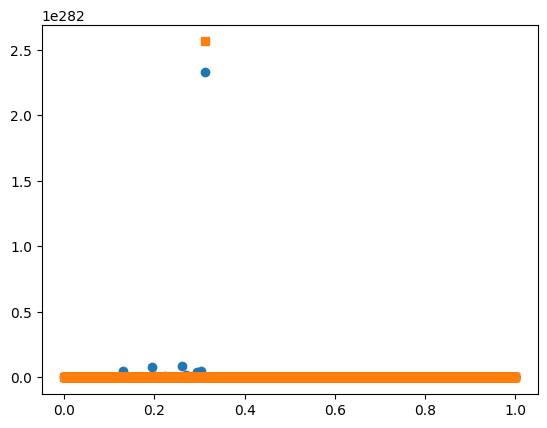

In [30]:
from numpy import linalg
a = np.array([[-10,10],
              [32, -499]])
t, y  = euler_solve2(a, u0=[1, 0], T=1, dt=4e-3)
T = 1
dt = 4e-4
y = np.empty((int(T/dt)+1,2))
num_steps = int(T/dt)
t = np.arange(num_steps+1)*dt
y[0,:] = u0
for k in range(num_steps):
    y[k+1,:] =  np.dot(linalg.inv(np.eye(2) - a),y[k+1,:])
print(len(y))

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, y[:, 1], 's', label='1, Euler')


## Задание 4. Исследование на A- и L-устойчивость.


Определить функцию устойчивости и область устойчивости метода Рунге-Кутты заданного таблицей Бутчера: 

\begin{array}{l|ll}
0 & 0 & 0 \\
2 & 3 / 2 & 1 / 2 \\
\hline & 3 / 4 & 1 / 4
\end{array}

Исследовать его на A- и L-устойчивость. 

Abs((z + 2)/(z - 2)) < 1

sqrt(x**2 + 4*x + y**2 + 4)/sqrt(x**2 - 4*x + y**2 + 4) < 1

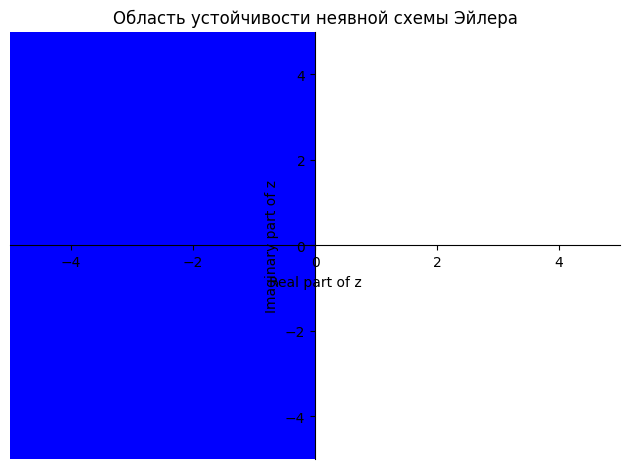

In [1]:
from sympy import symbols, Abs
from sympy import I
from sympy.plotting import plot_implicit

# Define the variable z
z = symbols('z', complex=True)
x, y = symbols('x y', real=True)
# Define the function R
R = (2 + z)/(2 - z)

# Define the absolute value of R
abs_R = Abs(R)

# Define the condition for the set |R(z)|<1
cond = abs_R < 1
display(cond)

z_number = x + I*y
cond = cond.subs(z, z_number)

display(cond.doit())
# Plot the set where |R(z)|<1

plot_implicit(cond, adaptive = False,
              title='Область устойчивости неявной схемы Эйлера',
              xlabel='Real part of z', ylabel='Imaginary part of z')

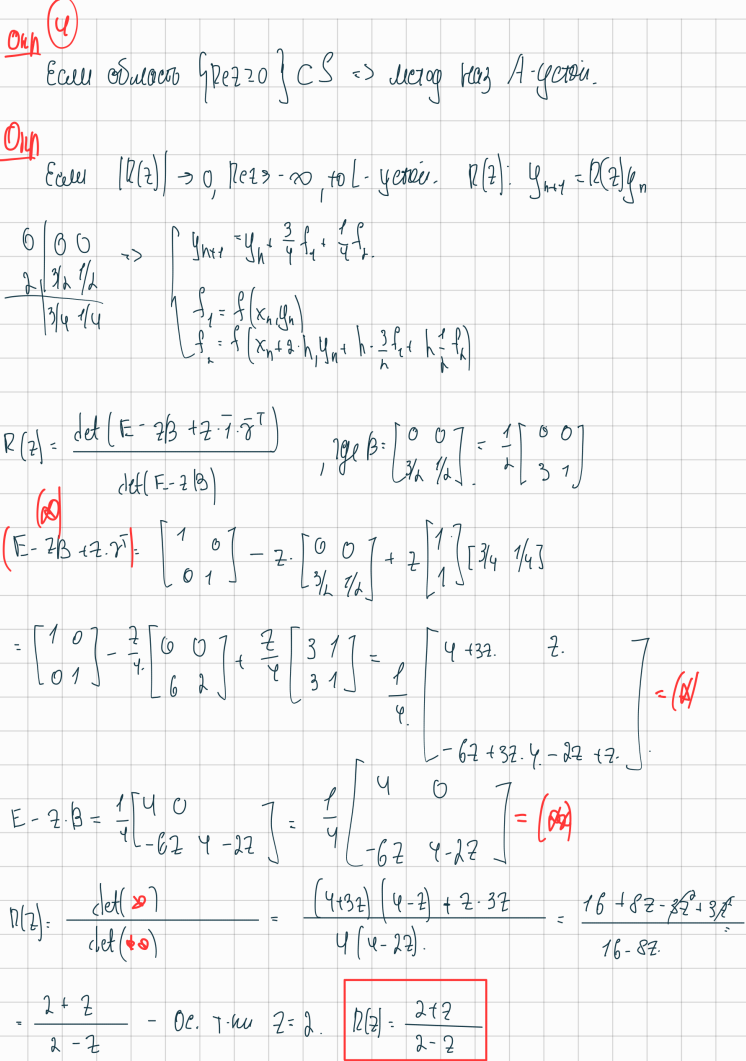


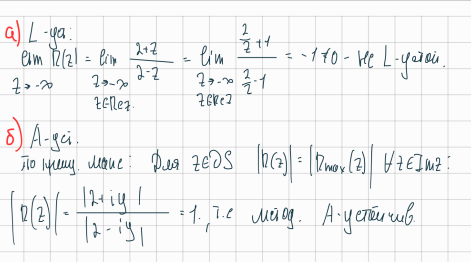

## Задание 5. Исследование на жесткость и область устойчивости.

Для решения задачи Коши системы ОДУ используется численный метод Рунге-Кутты, заданный таблицей Бутчера:
$$
\left.\begin{array}{c}
u^{\prime}=-400 u, u(0)=1, \\
v^{\prime}=3 \cdot 10^{-2} u-10 v+w, v(0)=-1, \\
w^{\prime}=-4 \cdot 10^{-2} u-12 v-2 w, w(0)=0,
\end{array}\right\} \quad \begin{array}{l|ll}
1 / 8 & 1 / 8 & 0 \\
7 / 8 & 3 / 4 & 1 / 8 \\
\hline & 1 / 2 & 1 / 2
\end{array}
$$
Получите для него функцию и условие устойчивости. Вычислите число жёсткости.

# Задача Коши для ОДУ второго порядка.


Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$



## Задание 6. Законы сохранения и решение ОДУ.


Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.


Решите данную систему уравнений, используя явную  схему Эйлера на интервале времени не менее десяти периодов осцилляций. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{(du/dt)^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

h =  8.79645943005142


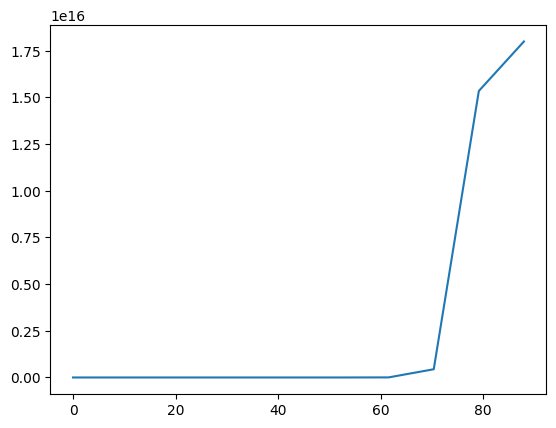

h =  0.0879645943005142


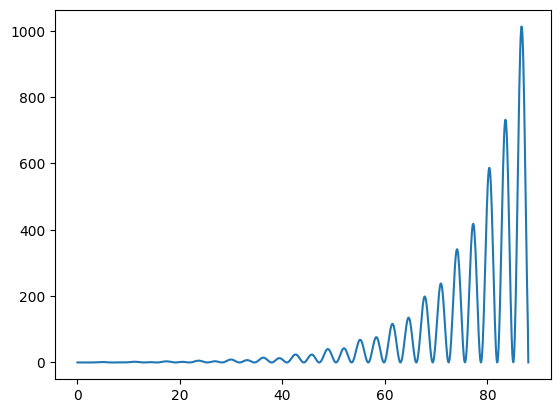

h =  0.008796459430051421


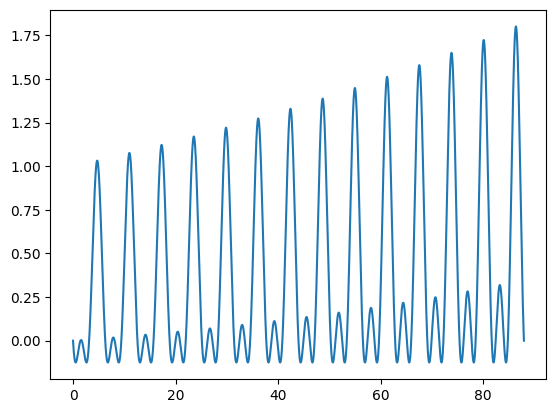

h =  0.000879645943005142


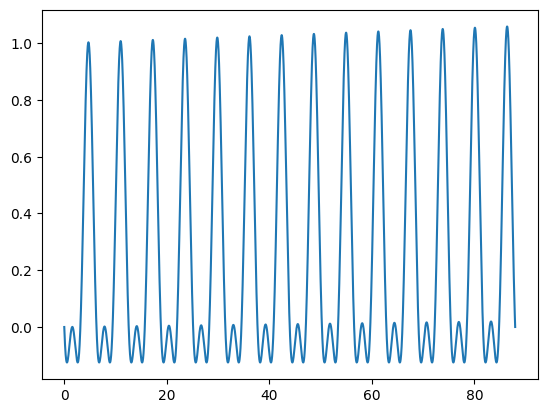

h =  8.796459430051421e-05


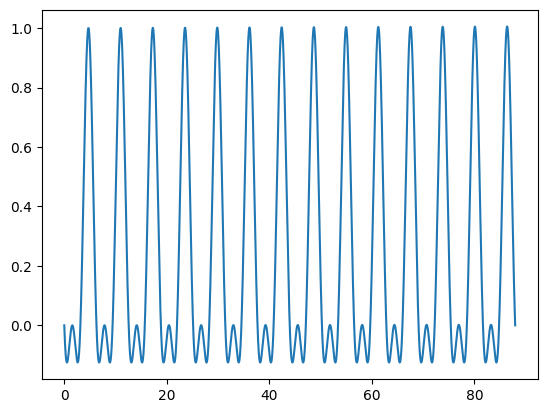

In [85]:
w = 1
a = 0
b = 2*np.pi*14
n_array = np.array([10, 10e2,10e3,10e4,10e5], dtype = int)

for n in n_array:
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    E = np.empty(len(x))
    y_1 = np.empty(n+1)
    y_2 = np.empty(n+1)
    y_1[0] = 0
    y_2[0] = 1
    for k in range(n):
        y_1[k+1] = h*y_2[k] + y_1[k]
        y_2[k+1] = h*(-w**2*y_1[k]) + y_2[k]
    E = np.empty(len(x))
    for k in range(0, n): 
        E[k] = (y_2[k+1] - y_2[k])/(h*2) + w**2*y_1[k]**2/2
    print("h = ",h)
    plt.plot(x,E)
    plt.show()





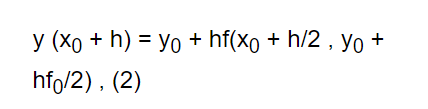

Реализуйте схему Рунге-Кутта второго порядка. Используте ее для решения того же уравнения с теми же значениями шага $\tau$. Сравните решения, полученные методом Рунге-Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

h =  8.79645943005142


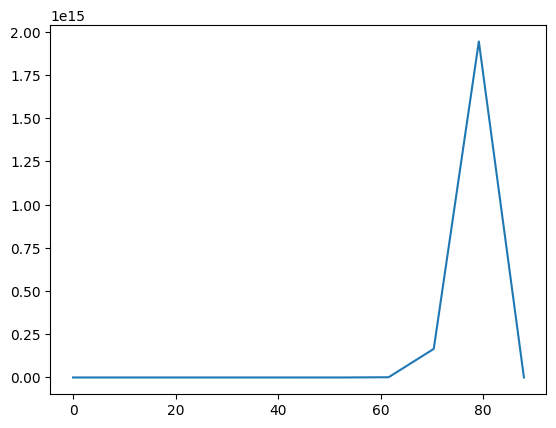

h =  0.0879645943005142


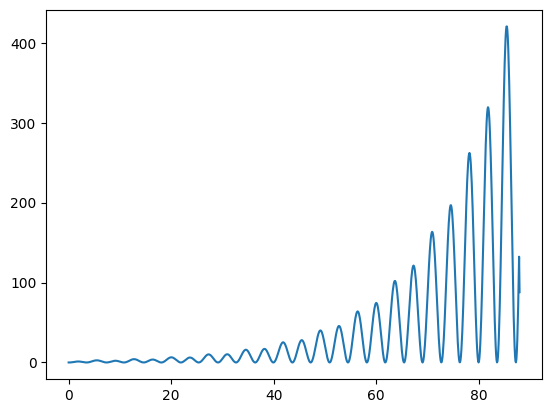

h =  0.008796459430051421


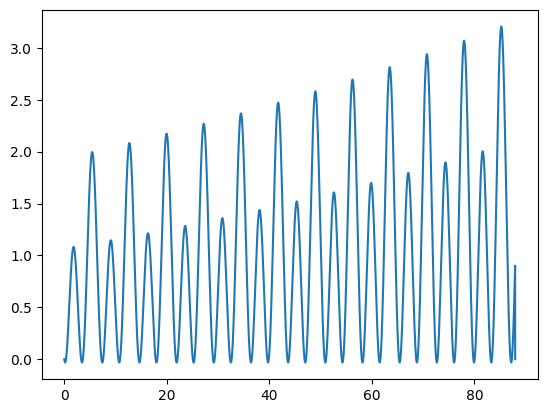

h =  0.000879645943005142


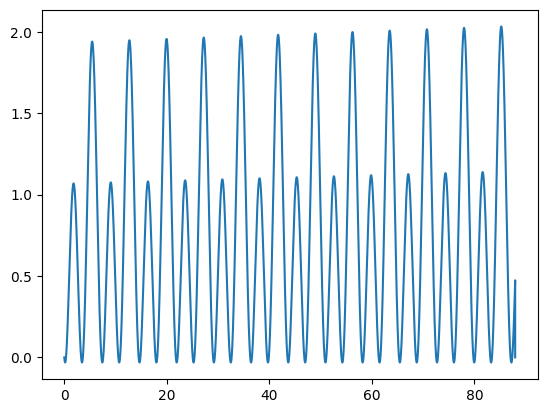

h =  8.796459430051421e-05


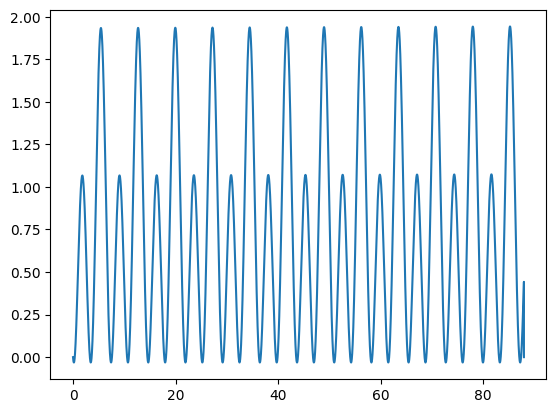

In [82]:
w = 1
a = 0
b = 2*np.pi*14
n_array = np.array([10, 10e2,10e3,10e4,10e5], dtype = int)

for n in n_array:
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    E = np.empty(len(x))
    y_1 = np.empty(n+1)
    y_2 = np.empty(n+1)
    y_1[0] = 0
    y_2[0] = 1
    for k in range(n):
        k1_1 = y_2[k]
        k2_1 = -w**2*y_1[k]

        k1_2 = h * (y_2[k] + k1_1/2)
        k2_2 = h * (-w**2*(y_1[k] + k2_1/2))
        
        y_1[k+1] = y_1[k] + k1_2
        y_2[k+1] = y_2[k] + k2_2
    E = np.empty(len(x))
    for k in range(0, n): 
        E[k] = (y_2[k+1] - y_2[k])/(h*2) + w**2*y_1[k]**2/2
    print("h = ",h)
    plt.plot(x,E)
    plt.show()




Проверьте соблюдение закона сохранения энергии после выполнения большого количества шагов. Нарисуйте графики решений вместе с графиком точного решения. 



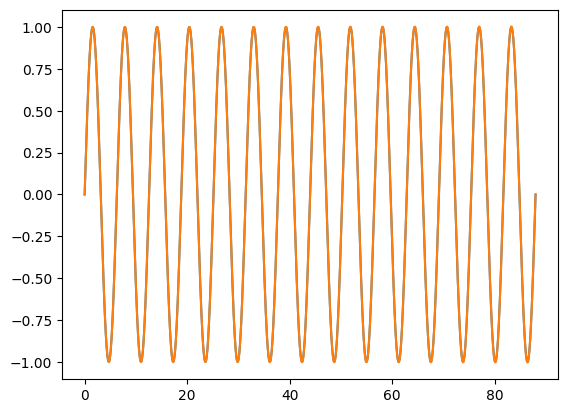

In [97]:
plt.plot(x,np.sin(x))
plt.plot(x,y_1)